# Prueba 2 Simulación 
## Introducción a la Comunicaciones
## Profesor: Jaime Anguita
### Joaquín Barrientos
19.889.690-K


Se inició importando las librerias que debemos utilizar para esta simulación.

In [301]:
import random
import matplotlib.pyplot as plt
import numpy as np

## Pregunta 1

Se generó la secuencia de números aleatorios binarios equiprobables usando una semilla aleatoria equivalente al número $\textit{RUT}$, que en este caso es $19.889.690-K$, al terminar en K, se eligió  $0$ para reemplazar.

In [302]:
random.seed(198896900)

Luego generamos el vector con los numeros aleatorios de tamaño $N = 10^5$ simbolos.

In [303]:
N = 10**5
bits = []
for i in range(N):
    bits.append(random.randint(0,1))

## Pregunta 2
### OOK

Se procedió a modular en $\textit{On-Off}$ $\textit{keying}$ la secuencia generada en la pregunta anterior, pero primero se generó la matriz de ceros para añadir los valores posteriormente. 




In [304]:
ook = np.zeros((N,8))

Se moduló la señal  y se ingresaron los valores correspondientes. Para esta codificación se presentan dos posibilidades, que sea $0$ o $1$. La secuencia tendrá $8*N$ elementos, con 8 muestras por periodo de bit. 

Por lo tanto si es $0$, se rellena un una de las filas de largo de $8$, con ceros.
En el otro caso, se rellena la fila con $1$.

Para efectos de poder hacer una revisión de los resultados, se deja en matriz las codificaciones.

Lo anterior se puede apreciar en el siguiente código:

In [305]:
 
 for i in range(len(bits)):
    if bits[i] == 0:
        ook[i] = np.array([0.0 for i in range(8)])
    else:
        ook[i] = np.array([1.0 for i in range(8)])


Para poder graficar esto, se debe convertir en un solo vector:

In [306]:
ook_vector = []

for i in range(len(ook)):
    for q in range(len(ook[i])):
        ook_vector.append(ook[i][q])

Se graficó las primeras 2000 muestras a continuación:

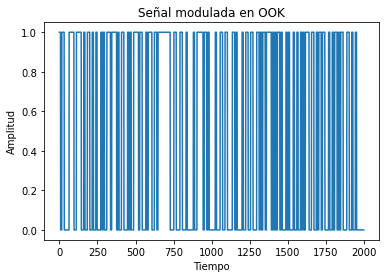

In [307]:

plt.title("Señal modulada en OOK")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo")
plt.plot(range(len(ook_vector[:2000])),ook_vector[:2000])
plt.show()

## Pregunta 3
### NRZ

Se procedió a modular en $\textit{Non  return-to-zero}$ la secuencia generada en la pregunta número $1$, pero antres se generó la matriz de ceros para añadir los valores posteriormente. 


In [308]:
nrz = np.zeros((N,8))

Se moduló la señal  y se ingresan los valores correspondientes. Para esta codificación se presentan dos posibilidades, que sea $-1$ o $1$. La secuencia tendrá $8*N$ elementos, con $8 $muestras por periodo de bit. 

Por lo tanto si es "$0$", se rellena un una de las filas de largo de $8$, con $-1$.
En el otro caso, se rellena la fila con $1$.

Lo anterior se puede apreciar en el siguiente código:

In [309]:
for i in range(len(bits)):
    if bits[i] == 0:
        nrz[i] = np.array([-1.0 for i in range(8)])
    else:
        nrz[i] = np.array([1.0 for i in range(8)])


Para poder graficar esto, debemos convertirlo en un solo vector:

In [310]:
nrz_vector = []

for i in range(len(nrz)):
    for q in range(len(nrz[i])):
        nrz_vector.append(nrz[i][q])

Se graficó las primeras 2000 muestras a continuación:

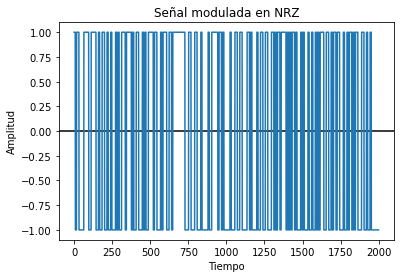

In [311]:
plt.title("Señal modulada en NRZ")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo")
plt.axhline(y=0, color='k')
plt.plot(range(len(nrz_vector[:2000])),nrz_vector[:2000])
plt.show()

## Pregunta 4
### Modulación PPM binaria 

Se moduló nuevamente la secuencia de la pregunta N°1, pero esta vez con $\textit{PPM binaria}$, donde el "$0$", se simboliza mediante una fila en la matriz de largo 8, rellenada con "$1$" en las muestras 0 a 3 del periodo y el resto "$0$". 

El "$1$" se simboliza mediante una fila en la matriz  de largo 8, rellenada con "$1$" en las muestras 4 a 7 del periodo, el resto son "$0$" en esta fila. 

Primero se procedió a realizar la matriz.

In [312]:
bppm = np.zeros((N,8))

En este paso se rellena la matriz dependiendo del valor de la secuencia

In [313]:
for i in range(len(bits)):
    if bits[i] == 0:
        bppm[i] = np.array([1.0 if i <= 3 else 0.0 for i in range(8)])
    else:
         bppm[i] = np.array([0 if i <= 3 else 1 for i in range(8)])
bppm

array([[0., 0., 0., ..., 1., 1., 1.],
       [1., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.]])

Para poder gráficar esto, se tuvo que convertir en un solo vector:

In [314]:
bppm_vector = []

for i in range(len(bppm)):
    for q in range(len(bppm[i])):
        bppm_vector.append(bppm[i][q])


Se graficó las primeras 700 muestras a continuación:

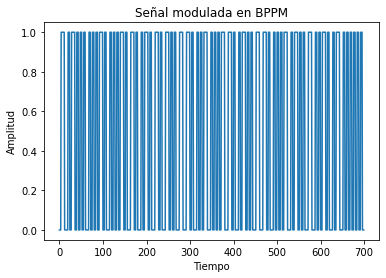

In [315]:
plt.title("Señal modulada en BPPM")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo")
plt.plot(range(len(bppm_vector[:700])),bppm_vector[:700])
plt.show()

## Pregunta 5 
 Se debe determinar el coeficiente de escalamiento de amplitud para cada modulación, como datos obtenemos:


In [316]:
Eb = 1
T = 1

### OOK
Para esta modulación el promedio de energía por bit es $E_{b} = \frac{A^2T}{2}$

In [317]:
A_ook = np.sqrt((2.0*Eb)/T)


Se genera el escalamiento

In [318]:
 for i in range(len(bits)):
    if bits[i] == 0:
        ook[i] = np.array([0.0 for i in range(8)])
    else:
        ook[i] = np.array([1.0*A_ook for i in range(8)])

Nuevamente para graficar se convirtió en un solo vector:

In [319]:
ook_vector = []

for i in range(len(ook)):
    for q in range(len(ook[i])):
        ook_vector.append(ook[i][q])
        


Se graficó las primeras 400 muestras a continuación:

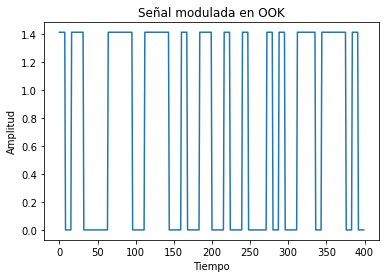

In [320]:
plt.title("Señal modulada en OOK")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo")
plt.plot(range(len(ook_vector[:400])),ook_vector[:400])
plt.show()

### NRZ
Para esta modulación el promedio de energía por bit es $E_{b} = A^2T$

In [321]:
A_nrz = np.sqrt((Eb)/T)


Se genera el escalamiento en la matriz NRZ, el cual no tendrá ningun cambio con la version de la pregunta N°3:

In [322]:
for i in range(len(bits)):
    if bits[i] == 0:
        nrz[i] = np.array([-1.0*A_nrz for i in range(8)])
    else:
        nrz[i] = np.array([1.0*A_nrz for i in range(8)])

Se vuelve a generar el vector NRZ para poder graficarlo

In [323]:
nrz_vector = []

for i in range(len(nrz)):
    for q in range(len(nrz[i])):
        nrz_vector.append(nrz[i][q])

Se graficó las primeras 400 muestras a continuación:

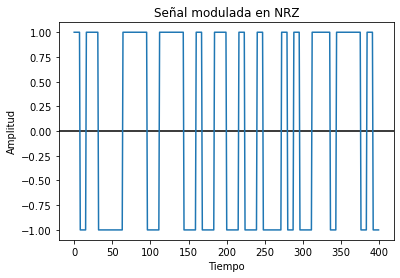

In [324]:
plt.title("Señal modulada en NRZ")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo")
plt.axhline(y=0, color='k')
plt.plot(range(len(nrz_vector[:400])),nrz_vector[:400])
plt.show()

### BPPM
Para esta modulación el promedio de energía por bit es $E_{b} = \frac{A^2 * \frac{1}{2} + A^2 * \frac{1}{2}}{2} $


In [325]:
A_bppm = np.sqrt(2*Eb)
A_bppm

1.4142135623730951

Se genera el escalamiento con A_bppm

In [326]:
for i in range(len(bits)):
    if bits[i] == 0:
        bppm[i] = np.array([1.0*A_bppm if i <= 3 else 0.0 for i in range(8)])
    else:
         bppm[i] = np.array([0.0 if i <= 3 else 1.0*A_bppm for i in range(8)])

Nuevamente para graficar se convirtió en un solo vector:

In [327]:
bppm_vector = []

for i in range(len(bppm)):
    for q in range(len(bppm[i])):
        bppm_vector.append(bppm[i][q])

Se graficó las primeras 200 muestras a continuación:

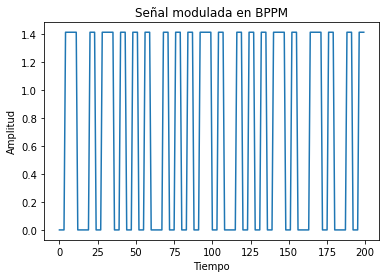

In [328]:
plt.title("Señal modulada en BPPM")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo")
plt.plot(range(len(bppm_vector[:200])),bppm_vector[:200])
plt.show()

## Pregunta 6
Se escogen 5 valores para la relación señal a ruido $\frac{E_{b}}{N_{o}}_{dB}$  entre 0 y 10 $[dB]$, que se aprecia en la siguente linea de codigo. 

In [329]:
EbNodb = [1.0,4.0,7.0,9.0,10.0]

Se definieron los sigmas para cada $\frac{E_{b}}{N_{o}}$.

In [330]:
sigma = []

for i in range(len(EbNodb)):
    EbNo = 10**((EbNodb[i]/10))
    sigma.append(np.sqrt(1/EbNo))

En la siguiente linea de código se generaron los ruidos para cada $\sigma_{n}$, los cuales se agregaron a una sola matriz.

In [331]:
ruidos = np.zeros((5,8*N))
for i in range(len(sigma)):
    ruidos[i] = (np.random.normal(0,sigma[i],8*N))

ruidos

array([[-1.61721529, -0.23470275,  0.49089943, ...,  1.04997786,
         0.75962453, -0.66256411],
       [ 0.57832432, -0.4662106 , -0.62223338, ..., -0.34964389,
        -0.7801046 ,  0.47783274],
       [-0.35706088, -1.0074072 ,  0.92393736, ..., -0.13967676,
        -0.45956461,  0.06277924],
       [-0.37617348, -0.31793538, -0.07280436, ..., -0.83703707,
        -0.19902192,  0.08829025],
       [-0.14271591, -0.11763918, -0.25665657, ..., -0.05417765,
         0.06693814,  0.29002943]])

## Pregunta 7

Se generaron las señales de tiempo ruidosas, se seleccionó el ruido n°3 de la matriz de ruidos.

### OOK



In [332]:
ook_noise_vector = []
for i in  range(len(ook_vector)):
    ook_noise_vector.append(ook_vector[i] + ruidos[3][i])

Se grafican los 10 primeros simbolos

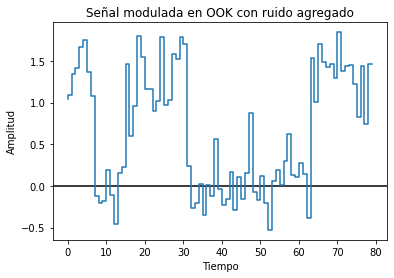

In [333]:
plt.title("Señal modulada en OOK con ruido agregado")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo")
plt.axhline(y=0, color='k')
plt.step(range(len(ook_noise_vector[:80])),ook_noise_vector[:80])
plt.show()

### NRZ
Para NRZ se hizo el mismo procedimiento

In [334]:
nrz_noise_vector = []
for i in  range(len(nrz_vector)):
    nrz_noise_vector.append(nrz_vector[i] + ruidos[3][i])

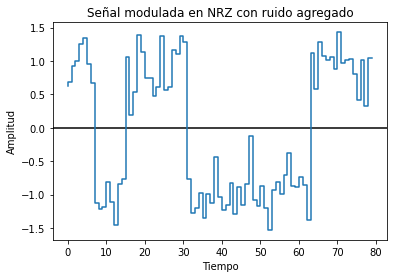

In [335]:
plt.title("Señal modulada en NRZ con ruido agregado")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo")
plt.axhline(y=0, color='k')
plt.step(range(len(nrz_noise_vector[:80])),nrz_noise_vector[:80])
plt.show()

### BPPM 
Nuevamente se realizó el mismo procedimiento

In [336]:
bppm_noise_vector = []
for i in  range(len(bppm_vector)):
    bppm_noise_vector.append(bppm_vector[i] + ruidos[3][i])

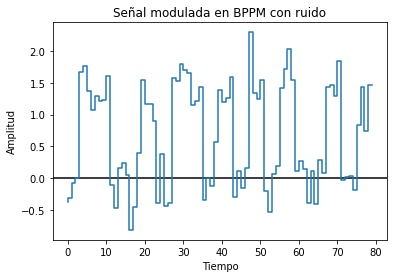

In [337]:
plt.title("Señal modulada en BPPM con ruido")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo")
plt.axhline(y=0, color='k')
plt.step(range(len(bppm_noise_vector[:80])),bppm_noise_vector[:80])
plt.show()

## Pregunta 8
Se procedió a realizar el detectores basados en filtros óptimos para cada tipo de modulación. Para esto se utlizan los métodos vistos en clase.

### OOK
Se definió el umbral para la detección de esta forma, debido a que en señales binarias, si los símbolos son equiprobables, es la suma de ambos símbolos dividido por dos.

In [338]:
umbral_ook = (A_ook + 0)/2

Como son 8 muestras por bit, se tomaron las 8 muestras para tomar el promedio. Como  $\textit{ook_noise_vector}$ tiene 8 veces más muestras, se elegieron cada 8, y se promediaron para luego poder juzgar que valor corresponde.

In [339]:
s_ook=[]
for i in range(len(bits)):
    b = 0.0
    inter = ook_noise_vector[i*8:(i+1)*8]
    for q in range(len(inter)):
        b += inter[q]
    s_ook.append(b/8)

En el siguiente código se realiza la comparación de cada valor de la lista creada anteriormente frente al umbral. Si es mayor que el umbral, entonces corresponde al símbolo "$1$". En el caso contrario, corresponde al valor "$0$"

In [340]:
for i in range(len(s_ook)):
    if s_ook[i] > umbral_ook:
        s_ook[i] = 1.0
    else:
        s_ook[i] = 0.0

La salida quedó de la siguiente forma en las primeras 100 muestras. Para comparar, también se muestra las 100 primeras muestras de la entrada original.

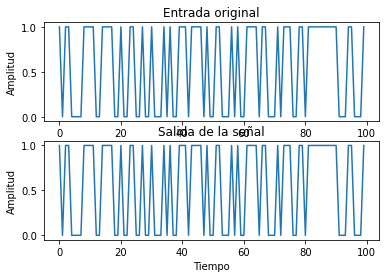

In [341]:

plt.subplot(2,1,1)
plt.title("Entrada original")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo")
plt.plot(range(len(bits[:100])),bits[:100])

plt.subplot(2,1,2)
plt.title("Salida de la señal")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo")
plt.plot(range(len(s_ook[:100])),s_ook[:100])

plt.show()

### NRZ
Para este caso se realizó el mismo procedimiento pero con valores distintos.



In [342]:
umbral_nrz = (A_nrz + -1*A_nrz)/2

In [343]:
s_nrz=[]
for i in range(len(bits)):
    b = 0.0
    inter = nrz_noise_vector[i*8:(i+1)*8]
    for q in range(len(inter)):
        b += inter[q]
    s_nrz.append(b/8)

In [344]:
for i in range(len(s_nrz)):
    if s_nrz[i] > umbral_nrz:
        s_nrz[i] = 1.0
    else:
        s_nrz[i] = 0.0

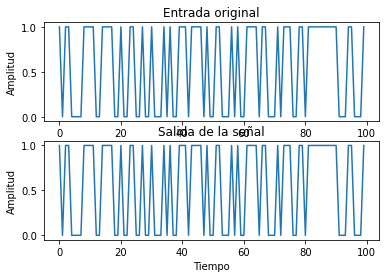

In [345]:
plt.subplot(2,1,1)
plt.title("Entrada original")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo")
plt.plot(range(len(bits[:100])),bits[:100])

plt.subplot(2,1,2)
plt.title("Salida de la señal")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo")
plt.plot(range(len(s_nrz[:100])),s_nrz[:100])

plt.show()

## Pregunta 9
### BPPM
Para este caso, se cambió la forma para realizar la detección, aunque es bastante parecida.


In [346]:
umbral_bppm = (A_bppm + 0)/2

En el siguiente código se realiza la comparación de cada valor de la lista creada anteriormente frente al umbral. Si el promedio de  la primera mitad es mayor que el umbral, entonces el valor corresponde al símbolo "$0$". En el caso de que el promedio de la segunda mitad, sea mayor que el umbral, entonces el valor corresponde al signo "$1$"

In [347]:
s_bppm=[]
for i in range(len(bits)):
    b1 = 0.0
    b2 = 0.0
    inter = nrz_noise_vector[i*8:(i+1)*8]
    mitad1 = inter[0:3]
    mitad2 = inter[4:7]

    for i in range(len(mitad1)):
        b1 += mitad1[i]
        b2 += mitad2[i]
    b1 = b1/4
    b2 = b2/4

    if b1 > umbral_bppm:
        s_bppm.append(0.0) 
   
    elif b2 > umbral_bppm:
        s_bppm.append(1.0) 



La salida quedó de la siguiente forma en las primeras 100 muestras. Para comparar,también se muestra las 100 primeras muestras de la entrada original.

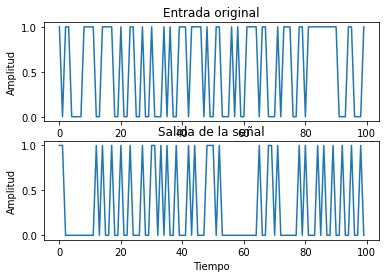

In [348]:
plt.subplot(2,1,1)
plt.title("Entrada original")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo")
plt.plot(range(len(bits[:100])),bits[:100])

plt.subplot(2,1,2)
plt.title("Salida de la señal")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo")
plt.plot(range(len(s_bppm[:100])),s_bppm[:100])

plt.show()

## Pregunta 10
Primero se determinó la cantidad de símbolos erróneos en cada demodulación y cada $\frac{E_{b}}{N_{o}}$. Para se debió declarar los vectores que contendran los valores a obtener para cada demodulación.


In [349]:
BER_ook = [None]*len(EbNodb)
Pe_ook = [None]*len(EbNodb)
ERR_ook = [None]*len(EbNodb)

BER_nrz = [None]*len(EbNodb)
Pe_nrz = [None]*len(EbNodb)
ERR_nrz = [None]*len(EbNodb)

BER_bppm = [None]*len(EbNodb)
Pe_bppm = [None]*len(EbNodb)
ERR_bppm = [None]*len(EbNodb)

Luego se realizó la obtención de errores para cada una de las modulaciones.

In [350]:
for i in range(len(EbNodb)):
    errores_ook = (bits != s_ook)
    errores_nrz = (bits != s_nrz)
    errores_bppm = (bits != s_bppm)